In [1]:
# 构建数据集
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
samples = 1000
features = 2
seed = 20181116
X, y = make_classification(n_samples=samples,        # 样本个数
                           n_features=features,          # 特征个数
                           n_informative=2,        # 有效特征个数
                           n_redundant=0,          # 冗余特征个数（有效特征的随机组合）
                           n_repeated=0,           # 重复特征个数（有效特征和冗余特征的随机组合）
                           n_classes=2,            # 样本类别
#                            n_clusters_per_class=1, # 簇的个数
                           random_state=seed)
# data, label = datasets.make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_repeated=0, random_state=20181116)

In [2]:
data = pd.DataFrame(X, columns=['f1', 'f2'])
data['label'] = y
# 截距
data['b'] = 1

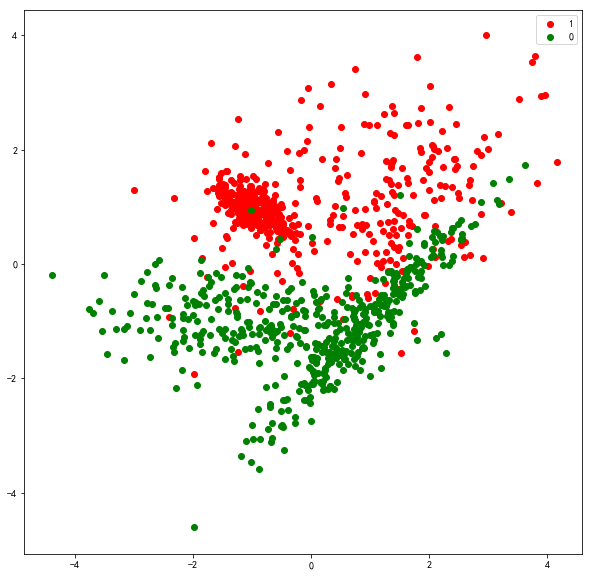

In [3]:
# 绘制数据集
plt.figure(figsize=(10, 10))
t = data.query('label == 1')
plt.scatter(x=t['f1'].values, y=t['f2'], c='r')
t = data.query('label == 0')
plt.scatter(x=t['f1'].values, y=t['f2'], c='g')
plt.legend([1, 0])
plt.show()

#### 逻辑回归的loss function
$J(\omega) = - \frac{1}{m} \sum_{i=1}^m \left [ y_i \ln h_{\omega}(x_i) + (1-y_i) \ln(1-h_{\omega}(x_i)  \right ]\tag{1}$

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
# 特征列
columns = ['f1', 'f2', 'b']
# 学习率
alpha = 0.001
# 用来存放每次迭代的loss
loss = [] 
# 迭代轮次
epoch = 50
# 样本数
m = data.shape[0]
# 初始化权重
np.random.seed(seed)
weights = np.random.random(size=3)#np.ones(shape=(features + 1, ))
# weights = np.random.(low=100, high=1000, size=3)
for col in range(epoch):
    # 计算logistic regression 权重仅下面一行
    weights += (alpha * np.sum((data['label'] - sigmoid(np.sum(data[columns] * weights.transpose(), axis=1))) * data[columns].T, axis=1)).values
    loss.append(-np.mean(data['label'] * np.log(sigmoid(np.sum(data[columns] * weights, axis=1))) + (1 - data['label']) * np.log(1 - sigmoid(np.sum(data[columns] * weights, axis=1)))))

D:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


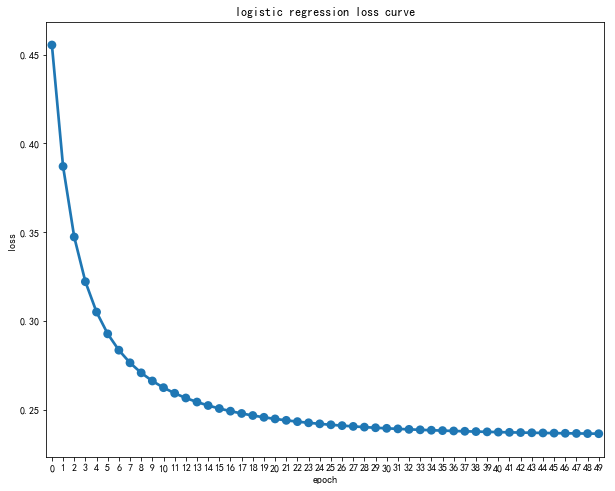

In [6]:
plt.figure(figsize=(10,8))
sns.pointplot(x=np.array(list(range(epoch))), y=np.array(loss))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('logistic regression loss curve')
plt.show()

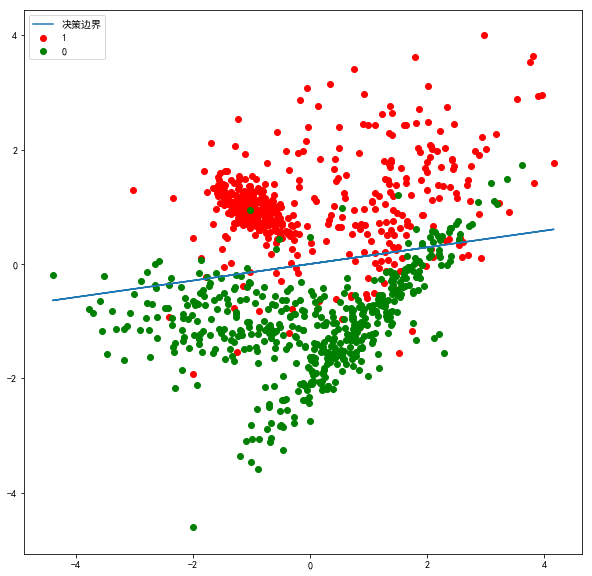

In [7]:
# 决策边界 在原始数据上绘制图
plt.figure(figsize=(10, 10))
t = data[columns]
t['x1'] = t['f1']
# 计算决策边界 x1 * theat1 + x2 * theat2 + theat3 = 0 解出来 x2即可
t['x2'] = ((- weights[2] - weights[0]) * t['x1']) / weights[1]
plt.plot(t['x1'].values, t['x2'].values)
t = data.query('label == 1')
plt.scatter(x=t['f1'].values, y=t['f2'], c='r')
t = data.query('label == 0')
plt.scatter(x=t['f1'].values, y=t['f2'], c='g')
# sns.pointplot(data=t, x='x1', y='x2')
plt.legend(['决策边界', '1', '0'])
plt.show()

In [8]:
# 计算概率
data['prob'] = sigmoid(np.sum(data[columns] * weights, axis=1))
# 预测label
data['pred_y'] = (data['prob'] > 0.5).astype(int)

#### 混淆矩阵
<img src='./img/confusion_matrix.png'>

In [9]:
# 根据上图分别计算TN FP FN TP
# TP(True Positive): 真实为1，预测也为1
tp = data.query('label == 1 and pred_y == 1').shape[0]
print(f'tp={tp}')
# FN(False Negative): 真实为1，预测为0
fn = data.query('label == 1 and pred_y == 0').shape[0]
print(f'fn={fn}')
# FP(False Positive): 真实为0，预测为1
fp = data.query('label == 0 and pred_y == 1').shape[0]
print(f'fp={fp}')
# TN(True Negative): 真实为0，预测也为0
tn = data.query('label == 0 and pred_y == 0').shape[0]
print(f'tn={tn}')

tp=452
fn=47
fp=42
tn=459


#### Accuracy
<img src='./img/accuracy.png'>

In [10]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f'accuracy={accuracy}')

accuracy=0.911


#### Precision
<img src='./img/precision.png'>

In [11]:
precision = tp / (tp + fp)
print(f'precision={precision}')

precision=0.9149797570850202


#### Recall
<img src='./img/recall.png'>

In [12]:
recall = tp / (tp + fn)
print(f'recall={recall}')

recall=0.905811623246493


#### specificity
<img src='./img/specificity.png'>

In [13]:
specificity = tn / (tn + fn)
print(f'specificity={specificity}')

specificity=0.9071146245059288


#### F1-score
<img src='./img/f1_score.png'>

In [14]:
f1_score = (2 * precision * recall) / (precision + recall)
print(f'F1-Score={f1_score}')

F1-Score=0.9103726082578045


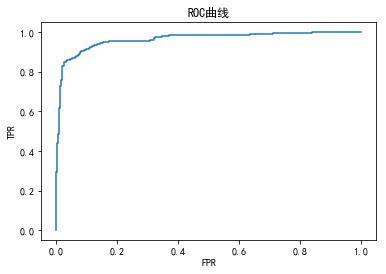

In [15]:
# ROC曲线
# (1)真正类率(True Postive Rate)TPR: TP/(TP+FN),代表分类器预测的正类中实际正实例占所有正实例的比例。
# (2)负正类率(False Postive Rate)FPR: FP/(FP+TN)，代表分类器预测的正类中实际负实例占所有负实例的比例。
t = data[['prob', 'label']].sort_values('prob', ascending=False)
TPR = []
FPR = []
for threshold in t['prob'].values:
    t['pred_y'] = (t['prob'] >= threshold).astype(int)
    tp = t.query('label == 1 and pred_y == 1').shape[0]
    fn = t.query('label == 1 and pred_y == 0').shape[0]
    fp = t.query('label == 0 and pred_y == 1').shape[0]
    tn = t.query('label == 0 and pred_y == 0').shape[0]
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    TPR.append(tpr)
    FPR.append(fpr)
# plt.figure(figsize=(8, 8))
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC曲线')
plt.show()

#### AUC
##### M为负样本个数 
##### N为正样本个数
<img src='./img/auc.png'>

In [16]:
M = t.query('label == 1').shape[0]
N = t.query('label == 0').shape[0]
t['rank'] = t['prob'].rank()

In [17]:
AUC = (np.sum(t.query('label == 1')['rank']) - M * (M + 1) / 2) / (M * N)
print(f"AUC={AUC}")

AUC=0.9645918583674334


In [18]:
from sklearn.metrics import roc_auc_score
sk_auc = roc_auc_score(t['label'], t['prob'])
print(f"sklearn auc {sk_auc}")

sklearn auc 0.9645918583674336
